In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dropout ,Activation,AveragePooling2D, normalization,Convolution2D,MaxPooling2D
from keras.layers import Dense, Flatten, Reshape, Input
from keras.utils import np_utils

In [0]:
X_train = np.load("/content/data/X_train.npy")
Y_train = np.load("/content/data/Y_train.npy")

In [14]:
X_train = X_train/255.0
Y_train = np_utils.to_categorical(Y_train)
print X_train.shape, Y_train.shape

(881, 200, 200, 3) (881, 2)


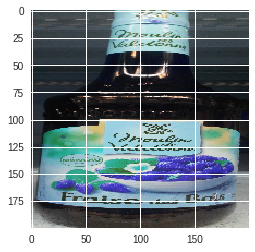

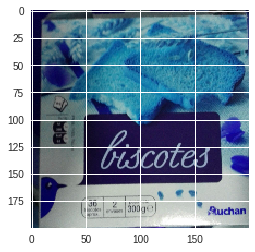

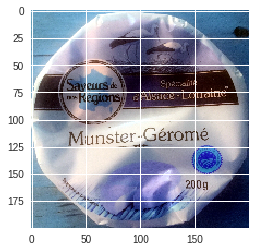

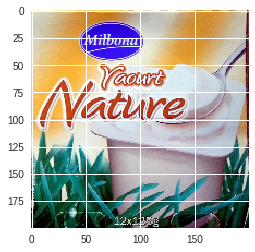

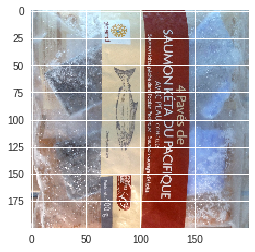

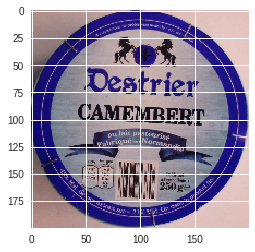

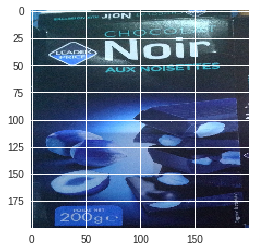

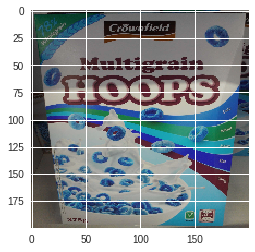

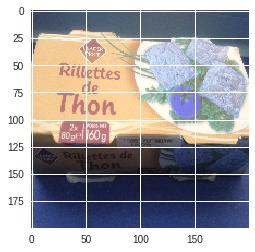

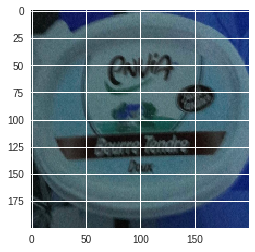

In [15]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], interpolation='none', cmap='gray')
plt.show()

In [16]:
inp = Input(shape=(200,200,3))

x1 = Convolution2D( 32,(11,11))(inp)

r1_a1 = Activation('relu')(x1)
r1_w1 = Convolution2D(64,( 11,11))(r1_a1)
r1_a2 = Activation('relu')(r1_w1)
max_pool_r1 = MaxPooling2D((2,2))(r1_a2)
r1_d1 = Dropout(0.2)(max_pool_r1)

x2 = Convolution2D(64,( 11,11))(r1_d1)

r2_a1 = Activation('relu')(x2)
r2_w1 = Convolution2D(32,( 11,11))(r2_a1)
r2_a2 = Activation('relu')(r2_w1)
max_pool_r2 = MaxPooling2D((2,2))(r2_a2)
r2_d1 = Dropout(0.2)(max_pool_r2)


x3 = Convolution2D(8,( 11,11))(r2_d1)
acti = Activation('relu')(x3)
max_pool_r3 = MaxPooling2D((2,2))(acti)
r3_d1 = Dropout(0.2)(max_pool_r3)
f1 = Flatten()(r3_d1)
fc1 = Dense(128)(f1)
a1 = Activation('relu')(fc1)
fc3 = Dense(2)(a1)
a3 = Activation('softmax')(fc3)

model = Model(outputs=a3, inputs=inp)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 190, 190, 32)      11648     
_________________________________________________________________
activation_1 (Activation)    (None, 190, 190, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 64)      247872    
_________________________________________________________________
activation_2 (Activation)    (None, 180, 180, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 90, 64)        0         
__________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
datagen.fit(X_train)

In [33]:
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=X_train.shape[0] / 32, epochs=20)

Epoch 1/20
27/27 [==============================] - 14s 527ms/step - loss: 1.1032 - acc: 0.7658
Epoch 2/20
27/27 [==============================] - 14s 516ms/step - loss: 0.5694 - acc: 0.7714
Epoch 3/20
27/27 [==============================] - 14s 518ms/step - loss: 0.5644 - acc: 0.7524
Epoch 4/20
27/27 [==============================] - 14s 518ms/step - loss: 0.5286 - acc: 0.7791
Epoch 5/20
27/27 [==============================] - 14s 519ms/step - loss: 0.5287 - acc: 0.7788
Epoch 6/20
27/27 [==============================] - 14s 525ms/step - loss: 0.5516 - acc: 0.7604
Epoch 7/20
27/27 [==============================] - 14s 522ms/step - loss: 0.5436 - acc: 0.7666
Epoch 8/20
27/27 [==============================] - 14s 516ms/step - loss: 0.5449 - acc: 0.7657
Epoch 9/20
 5/27 [====>.........................] - ETA: 11s - loss: 0.5482 - acc: 0.7625

27/27 [==============================] - 14s 517ms/step - loss: 0.5361 - acc: 0.7729
Epoch 10/20
27/27 [==============================] - 14s 527ms/step - loss: 0.5314 - acc: 0.7766
Epoch 11/20
27/27 [==============================] - 14s 510ms/step - loss: 0.5449 - acc: 0.7660
Epoch 12/20
27/27 [==============================] - 14s 522ms/step - loss: 0.5272 - acc: 0.7801
Epoch 13/20
27/27 [==============================] - 14s 512ms/step - loss: 0.5527 - acc: 0.7594
Epoch 14/20
27/27 [==============================] - 14s 517ms/step - loss: 0.5432 - acc: 0.7669
Epoch 15/20
27/27 [==============================] - 14s 527ms/step - loss: 0.5565 - acc: 0.7558
Epoch 16/20
27/27 [==============================] - 14s 511ms/step - loss: 0.5382 - acc: 0.7716
Epoch 17/20
 7/27 [======>.......................] - ETA: 10s - loss: 0.5315 - acc: 0.7768

27/27 [==============================] - 14s 518ms/step - loss: 0.5293 - acc: 0.7789
Epoch 18/20
27/27 [==============================] - 14s 523ms/step - loss: 0.5298 - acc: 0.7778
Epoch 19/20
27/27 [==============================] - 14s 518ms/step - loss: 0.5517 - acc: 0.7600
Epoch 20/20
27/27 [==============================] - 14s 519ms/step - loss: 0.5435 - acc: 0.7667


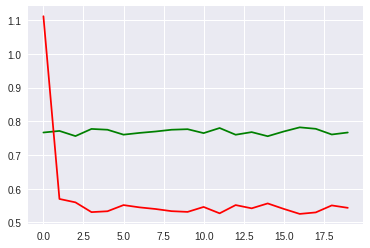

In [34]:
plt.plot(hist.history['acc'],'g')
#plt.plot(hist.history['val_acc'],'b')
plt.plot(hist.history['loss'],'r')
#plt.plot(hist.history['val_loss'],'black')

In [0]:
model.save("bottle_classifier.h5")